<a href="https://colab.research.google.com/github/silkk-nn/r2bDataEn/blob/main/%5BStart%5D_Workshop2_Data_Cleansing_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2: Data Cleansing with Spark

ภาพรวมของคอร์สนี้

![alt text](https://cdn-std.droplr.net/files/acc_513973/z7Gqhs)

Workshop 2 นี้เราจะทำอะไรกันบ้าง

![alt text](https://cdn-std.droplr.net/files/acc_513973/SCN8wh)

## Spark Cheatsheet by DataCamp

แนะนำให้โหลดเก็บไว้ อุ่นใจกว่า <3

![alt text](https://cdn-std.droplr.net/files/acc_513973/PglivG)

**RDD:**
https://www.datacamp.com/community/blog/pyspark-cheat-sheet-python 

**DataFrame:**
https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet

## ข้อมูลขายของออนไลน์
### Data Dictionary
https://archive.ics.uci.edu/ml/datasets/Online+Retail

This is a transactional data set which contains all the transactions occurring between 01/12/2018 and 09/12/2019 for a UK-based and registered non-store online retail.

The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.


## ลง Pyspark และเชื่อมต่อ Google Colab กับ Google Drive

In [1]:
# [6/2021] Update: เราอัพเดท Spark เป็นเวอร์ชั่นใหม่ล่าสุดให้เพื่อน ๆ ได้ลองเล่น ถ้าดูจากคลิปเห็นเป็นคนละเวอร์ชั่นไม่ต้องตกใจนะครับ คำสั่งเหมือนเดิม

# ลง Spark ใน Google Colab
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark==1.3.0

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [716 kB]
Get:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [

In [2]:
# Set enviroment variable ให้รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [3]:
# ลง pyspark ผ่านคำสั่ง pip
!pip install pyspark==3.1.2

     |████████████████████████████████| 212.4 MB 55 kB/s 
     |████████████████████████████████| 198 kB 28.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=4d24a5cefc9c6ab1058e85aa221faf55a1e5841d0dfaf5ed97194d9b1eea6d12
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


#### ใช้งาน Spark

ใช้ `local[*]` เพื่อเปิดการใช้งานการประมวลผลแบบ multi-core. Spark จะใช้ CPU ทุก core ที่อนุญาตให้ใช้งานในเครื่อง.

In [4]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [5]:
# สร้าง Spark Session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "legacy") # เพิ่มบรรทัดนี้ขึ้นมา เพื่อให้ Spark 3 ทำงานเหมือน Spark 2 (หากไม่ใส่ จะทำให้เกิด Error เวลาใช้ Function)

In [6]:
# Get Python version
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)

In [7]:
# Get Spark version
spark.version

'3.1.2'

#### เชื่อมต่อ Google Drive

เมื่อรันแล้วจะมีลิงค์ให้กด กรุณากดลิงค์ และเลือกบัญชี Google ของคุณ จากนั้นก็อปปี้โค้ดมาใส่ในกล่องข้อความ (หรือดูวิธีตามวีดิโอ Workshop ก็ได้ครับ)

In [8]:
# เชื่อมต่อ Google colab กับ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

แก้ลิงค์ไฟล์ให้เป็นลิงค์ใน Google Drive ของคุณเอง มิฉะนั้นจะรันแล้ว Error (ดูวิธีได้จากในวีดิโอ Workshop)

ใช้คำสั่ง `spark.read.csv` เพื่ออ่านข้อมูลจากไฟล์ CSV

Arguments:

Header = True << บอกให้ Spark รู้ว่าบรรทัดแรกในไฟล์ CSV เป็น Header


Inferschema = True << บอกให้ Spark พยายามเดาว่าแต่ละ column มี type เป็นอะไร ถ้าตั้งเป็น False, ทุก column จะถูกอ่านเป็น string

In [9]:
dt = spark.read.csv('/content/drive/MyDrive/R2DEWORKSHOP/Online Retail WS2.csv', header = True, inferSchema = True, )

### Data Profiling

Data Profiling is a process of analysing summary of the data.

Example: max, min, average, sum, how many missing values etc.

#### Data

> Columns
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

In [10]:
dt

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: double, Country: string]

In [11]:
dt.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [12]:
dt.show(100)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|1/12/2018 08:26|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|1/12/2018 08:

In [13]:
# Show Schema
dt.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'double'),
 ('CustomerID', 'double'),
 ('Country', 'string')]

In [14]:
# Show Schema (อีกแบบ)
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [15]:
# นับจำนวนแถวและ column
print((dt.count(), len(dt.columns)))

(541909, 8)


In [16]:
# สรุปข้อมูลสถิติ
dt.describe().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280805186| 16799.73762842771|                null|218.08115785023477|           null|96.75985306117933|1713.6003033215918|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [17]:
# สรุปข้อมูลสถิติ
dt.summary().show()

+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|summary|         InvoiceNo|         StockCode|         Description|          Quantity|    InvoiceDate|        UnitPrice|        CustomerID|    Country|
+-------+------------------+------------------+--------------------+------------------+---------------+-----------------+------------------+-----------+
|  count|            541909|            541909|              540455|            541909|         541909|           541909|            406829|     541909|
|   mean|  559965.752026781|27623.240210938104|             20713.0|  9.55224954743324|           null|4.611113626082972|15287.690570239585|       null|
| stddev|13428.417280805186| 16799.73762842771|                null|218.08115785023477|           null|96.75985306117933|1713.6003033215918|       null|
|    min|            536365|             10002| 4 PURPLE FLOCK D...|            -8

In [18]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt.select("Quantity", "UnitPrice").describe().show()

+-------+------------------+-----------------+
|summary|          Quantity|        UnitPrice|
+-------+------------------+-----------------+
|  count|            541909|           541909|
|   mean|  9.55224954743324|4.611113626082972|
| stddev|218.08115785023477|96.75985306117933|
|    min|            -80995|        -11062.06|
|    max|             80995|          38970.0|
+-------+------------------+-----------------+



### Exercise: ลองเช็ค Median ของ ค่า Quantity

In [26]:
# Write Answer here
dt.select("Quantity").summary().collect()[5]["Quantity"]

'3'

### ดู Summary แล้วเห็นอะไรบ้าง?
- Missing values?
- Mean, Min, Max

## EDA - Exploratory Data Analysis

### Non-Graphical EDA

In [27]:
# Select text-based information
dt.where(dt['Quantity'] < 0).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|  C536379|        D|            Discount|      -1|1/12/2018 09:41|     27.5|   14527.0|United Kingdom|
|  C536383|   35004C|SET OF 3 COLOURED...|      -1|1/12/2018 09:49|     4.65|   15311.0|United Kingdom|
|  C536391|    22556|PLASTERS IN TIN C...|     -12|1/12/2018 10:24|     1.65|   17548.0|United Kingdom|
|  C536391|    21984|PACK OF 12 PINK P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21983|PACK OF 12 BLUE P...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21980|PACK OF 12 RED RE...|     -24|1/12/2018 10:24|     0.29|   17548.0|United Kingdom|
|  C536391|    21484|CHICK GREY HOT WA...|     -12|1/12/2018 10:

### Exercise: 
1. ลองเลือก Quantity ระหว่าง 50 - 120
2. ลองเลือก UnitPrice ระหว่าง 0.1 - 0.5
3. Quantity ระหว่าง 50 - 120 และ UnitPrice ระหว่าง 0.1 - 0.5

In [28]:
# TODO: 1. Quantity 50 - 120
dt.where( (dt['Quantity'] > 50) & (dt['Quantity'] < 120) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536371|    22086|PAPER CHAIN KIT 5...|      80|1/12/2018 09:00|     2.55|   13748.0|United Kingdom|
|   536376|    21733|RED HANGING HEART...|      64|1/12/2018 09:32|     2.55|   15291.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536386|   85099C|JUMBO  BAG BAROQU...|     100|1/12/2018 09:57|     1.65|   16029.0|United Kingdom|
|   536386|   85099B|JUMBO BAG RED RET...|     100|1/12/2018 09:57|     1.65|   16029.0|United Kingdom|
|   536390|   85123A|WHITE HANGING HEA...|      64|1/12/2018 10:19|     2.55|   17511.0|United Kingdom|
|   536390|    22197|SMALL POPCORN HOLDER|     100|1/12/2018 10:

In [29]:
# TODO: 2. UnitPrice 0.1 - 0.5
dt.where( (dt['UnitPrice'] >= 0.1) & (dt['UnitPrice'] <= 0.5) ).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536370|    22540|MINI JIGSAW CIRCU...|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536370|    22544|MINI JIGSAW SPACEBOY|      24|1/12/2018 08:45|     0.42|   12583.0|        France|
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536388|    22915|ASSORTED BOTTLE T...|      12|1/12/2018 09:59|     0.42|   16250.0|United Kingdom|
|   536390|    20668|DISCO BALL CHRIST...|     288|1/12/2018 10:19|      0.1|   17511.0|United Kingdom|
|   536390|    21786|  POLKADOT RAIN HAT |     144|1/12/2018 10:

In [30]:
# TODO: 3. Quantity 50 - 120 and UnitPrice 0.1 - 0.5
dt.where(dt['Quantity'].between(50,120) & dt['UnitPrice'].between(0.1,0.5)).show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536378|    21212|PACK OF 72 RETROS...|     120|1/12/2018 09:37|     0.42|   14688.0|United Kingdom|
|   536378|   85071B|RED CHARLIE+LOLA ...|      96|1/12/2018 09:37|     0.38|   14688.0|United Kingdom|
|   536532|    84692|BOX OF 24 COCKTAI...|      50|1/12/2018 13:24|     0.42|   12433.0|        Norway|
|   536563|   85199S|SMALL HANGING IVO...|      72|1/12/2018 15:08|     0.42|   17760.0|United Kingdom|
|   536617|    85175|CACTI T-LIGHT CAN...|      96|2/12/2018 10:17|     0.42|   13941.0|United Kingdom|
|   536620|    21215|IVORY PAPER CUP C...|     120|2/12/2018 10:27|     0.42|   14135.0|United Kingdom|
|   536620|    21212|PACK OF 72 RETROS...|     120|2/12/2018 10:

### Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
# แปลง Spark Dataframe เป็น Pandas Dataframe
dt_pd = dt.toPandas()

In [33]:
dt_pd.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2018 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2018 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2018 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2018 08:26,3.39,17850.0,United Kingdom


In [34]:
# เลือกข้อมูล 500 แถวแรกเพื่อความรวดเร็วและความเรียบง่ายในการ visualize ข้อมูล
dt_pd_subset = dt_pd[0:500]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


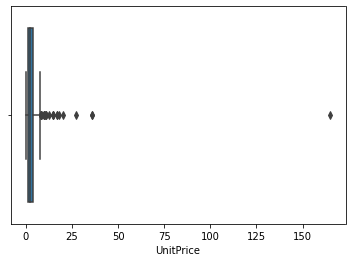

In [35]:
# Boxplot
sns.boxplot(dt_pd_subset['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


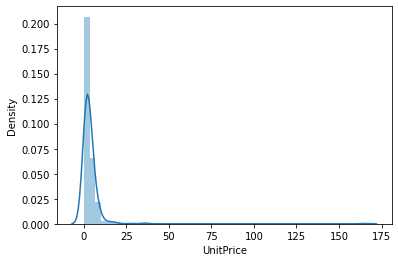

In [36]:
# Histogram
sns.distplot(dt_pd_subset['UnitPrice']) 
plt.show()

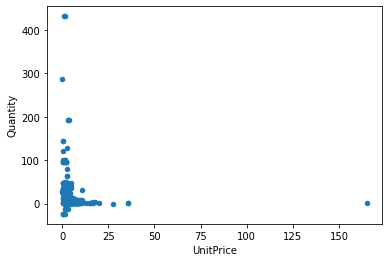

In [37]:
# Scatterplot
dt_pd_subset.plot.scatter('UnitPrice', 'Quantity')

#### Bonus: สร้าง interactive chart

In [39]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd_subset, 'UnitPrice', 'Quantity')
fig.show()

### Type Conversion

แปลง `InvoiceDate` จาก string -> date

In [40]:
# Show top 5 rows
dt.show(5)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
only showing top 5 rows



In [41]:
# Show Schema
dt.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



Is the date DD/MM/YYYY or MM/DD/YYYY? Let's find out



In [42]:
# Show unique Invoice Date
dt.select("InvoiceDate").distinct().show()

+----------------+
|     InvoiceDate|
+----------------+
| 2/12/2018 11:23|
| 6/12/2018 13:41|
| 9/12/2018 14:44|
|13/12/2018 13:09|
|13/12/2018 16:46|
|14/12/2018 10:28|
|21/12/2018 15:13|
|  7/1/2019 15:19|
| 12/1/2019 09:48|
| 14/1/2019 14:28|
| 19/1/2019 14:43|
| 26/1/2019 17:15|
|  1/2/2019 10:04|
|  1/2/2019 12:53|
|  3/2/2019 11:30|
|  7/2/2019 14:51|
| 14/2/2019 12:36|
| 14/2/2019 13:11|
| 24/2/2019 09:05|
| 25/2/2019 13:56|
+----------------+
only showing top 20 rows



In [43]:
# แปลง string เป็น date
from pyspark.sql import functions as f

# dt_temp = dt.withColumn('InvoiceDateTime', functions.to_date(
#     functions.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
# ))

dt_temp = dt.withColumn('InvoiceDateTime', 
    f.unix_timestamp('InvoiceDate', 'dd/MM/yyyy HH:mm').cast('timestamp')
)
dt_temp.show()

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|1/12/2018 08:26|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|1/12/2018 08:26|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|1/12/2018 08:26|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   5363

In [44]:
dt_temp.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



In [46]:
dt_final = dt_temp.drop('InvoiceDate')
dt_final.show()

+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|       Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+--------------+-------------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|United Kingdom|2018-12-01 08:26:00|
|   536365|    21730|GLASS S

In [47]:
dt_final.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- InvoiceDateTime: timestamp (nullable = true)



## Data Cleansing with Spark

### Anomalies Check

#### Syntactical Anomalies
**Lexical errors** เช่น พิมพ์ผิด

In [48]:
# Check country distinct values. Find something interesting?
# ลองมาดูชื่อประเทศกัน เจออะไรบ้าง ?
dt_final.select("Country").distinct().show()

+------------------+
|           Country|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|             EIREs|
|           Denmark|
|         Hong Kong|
|           Iceland|
+------------------+
only showing top 20 rows



In [49]:
dt_final.where(dt_final['Country'] == 'EIREs').show()

+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|Country|    InvoiceDateTime|
+---------+---------+--------------------+--------+---------+----------+-------+-------------------+
|   539473|       C2|            CARRIAGE|       1|     50.0|   14911.0|  EIREs|2018-12-19 14:24:00|
|   542216|    84978|HANGING HEART JAR...|      24|     1.25|   14911.0|  EIREs|2019-01-26 12:29:00|
|   560451|    22844|VINTAGE CREAM DOG...|       2|      8.5|   14911.0|  EIREs|2019-07-19 09:50:00|
|   565748|    23163| REGENCY SUGAR TONGS|       8|     2.49|   14156.0|  EIREs|2019-09-06 12:38:00|
|   565928|    21889|WOODEN BOX OF DOM...|      12|     1.25|      null|  EIREs|2019-09-08 10:09:00|
+---------+---------+--------------------+--------+---------+----------+-------+-------------------+



In [50]:
# เปลี่ยน EIREs เป็น EIRE
from pyspark.sql.functions import when

dt_temp_eire = dt_final.withColumn("CountryUpdate", when(dt_final['Country'] == 'EIREs', 'EIRE').otherwise(dt_final['Country']))

In [51]:
# Check the result
dt_temp_eire.select("CountryUpdate").distinct().show()

+------------------+
|     CountryUpdate|
+------------------+
|            Sweden|
|         Singapore|
|           Germany|
|               RSA|
|            France|
|            Greece|
|European Community|
|           Belgium|
|           Finland|
|             Malta|
|       Unspecified|
|             Italy|
|              EIRE|
|         Lithuania|
|            Norway|
|             Spain|
|           Denmark|
|         Hong Kong|
|           Iceland|
|            Israel|
+------------------+
only showing top 20 rows



In [52]:
# Create final Dataframe
dt_final_eire = dt_temp_eire.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [53]:
dt_final_eire.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    21730|GLASS S

#### Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- Stockcode: ค่าจะต้องเป็นตัวเลข 5 ตัว

In [54]:
dt_final_eire.select("Stockcode").show(100)

+---------+
|Stockcode|
+---------+
|   85123A|
|    71053|
|   84406B|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    22633|
|    22632|
|    84879|
|    22745|
|    22748|
|    22749|
|    22310|
|    84969|
|    22623|
|    22622|
|    21754|
|    21755|
|    21777|
|    48187|
|    22960|
|    22913|
|    22912|
|    22914|
|    21756|
|    22728|
|    22727|
|    22726|
|    21724|
|    21883|
|    10002|
|    21791|
|    21035|
|    22326|
|    22629|
|    22659|
|    22631|
|    22661|
|    21731|
|    22900|
|    21913|
|    22540|
|    22544|
|    22492|
|     POST|
|    22086|
|    22632|
|    22633|
|   85123A|
|    71053|
|   84406B|
|    20679|
|    37370|
|    21871|
|    21071|
|    21068|
|    82483|
|    82486|
|    82482|
|   82494L|
|   84029G|
|   84029E|
|    22752|
|    21730|
|    21258|
|   85123A|
|    71053|
|   84406B|
|    20679|
|    37370|
|    21871|
|    21071|
|    21068|
|    82483|
|    82486|
|    82482|
|   82494L|
|   84029G|
|   84029E|
|   

In [55]:
dt_final_eire.count()

541909

In [56]:
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).count()

487036

In [57]:
# ลองดูข้อมูลที่ถูกต้อง
dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$")).show(5)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|     4.25|   17850.0|2018-12-01 08:26:00|United Kingdom|
|   536366|    22633|HAND WARMER UNION...|       6|     1.85|   17850.0|2018-12-01 08:28:00|United Kingdom|
|   536366|    22632|HAND WARMER RED P...|       6|     1.85|   17850.0|2018-12-01 08:28:00|United Kingdom|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
only showing top 5 rows



In [58]:
# ลองดูข้อมูลที่ไม่ถูกต้อง
dt_correct_stockcode = dt_final_eire.filter(dt_final_eire["Stockcode"].rlike("^[0-9]{5}$"))
dt_incorrect_stockcode = dt_final_eire.subtract(dt_correct_stockcode)

dt_incorrect_stockcode.show(10)

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+
|   540122|   84926E|FLOWERS TILE COASTER|      96|     0.42|   13694.0|2019-01-05 10:39:00|United Kingdom|
|   542936|   84596G|SMALL CHOCOLATES ...|       1|     1.25|      null|2019-02-02 11:10:00|United Kingdom|
|   539479|   84997B|RED 3 PIECE RETRO...|       1|     3.75|      null|2018-12-19 15:20:00|United Kingdom|
|   545308|   84406B|CREAM CUPID HEART...|       1|     4.15|   14656.0|2019-03-01 13:19:00|United Kingdom|
|   576687|   85099B|JUMBO BAG RED RET...|       3|     2.08|   13558.0|2019-11-16 12:13:00|United Kingdom|
|   542374|   46000S|POLYESTER FILLER ...|       4|     1.45|   15696.0|2019-01-27 13:40:00|United Kingdom|
|   552572|   84997A|CHILDRE

> คุณเห็น Pattern ของ Stock Code ที่ไม่ถูกต้องหรือยัง?

In [59]:
# ลบตัวอักษรตัวสุดท้ายออกจาก stock code
from pyspark.sql.functions import regexp_replace

dt_temp_stockcode = dt_final_eire.withColumn("StockcodeUpdate", regexp_replace(dt_final_eire['Stockcode'], r'[A-Z]', ''))

In [60]:
# Check the result
dt_temp_stockcode.show()

+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|InvoiceNo|StockCode|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockcodeUpdate|
+---------+---------+--------------------+--------+---------+----------+-------------------+--------------+---------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|          85123|
|   536365|    71053| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          71053|
|   536365|   84406B|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|          84406|
|   536365|   84029G|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          84029|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|          84029|
|   5363

In [61]:
# Create final Dataframe
dt_final_stockcode = dt_temp_stockcode.drop("Stockcode").withColumnRenamed('StockcodeUpdate', 'StockCode')

In [62]:
dt_final_stockcode.show(4)

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
only showing top 4 rows



#### Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

In [63]:
# Check จำนวน missing values ในแต่ละ column
from pyspark.sql.functions import col,sum

dt_final_stockcode.select(*[sum(col(c).isNull().cast("int")).alias(c) for c in dt_final_stockcode.columns]).show()

+---------+-----------+--------+---------+----------+---------------+-------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|InvoiceDateTime|Country|StockCode|
+---------+-----------+--------+---------+----------+---------------+-------+---------+
|        0|       1454|       0|        0|    135080|              0|      0|        0|
+---------+-----------+--------+---------+----------+---------------+-------+---------+



In [64]:
# Check ว่ามีแถวไหนที่ description เป็น null บ้าง

dt_final_stockcode.where( dt_final_stockcode['Description'].isNull() ).show()

+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+-----------+--------+---------+----------+-------------------+--------------+---------+
|   536414|       null|      56|      0.0|      null|2018-12-01 11:52:00|United Kingdom|    22139|
|   536545|       null|       1|      0.0|      null|2018-12-01 14:32:00|United Kingdom|    21134|
|   536546|       null|       1|      0.0|      null|2018-12-01 14:33:00|United Kingdom|    22145|
|   536547|       null|       1|      0.0|      null|2018-12-01 14:33:00|United Kingdom|    37509|
|   536549|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    85226|
|   536550|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    85044|
|   536552|       null|       1|      0.0|      null|2018-12-01 14:34:00|United Kingdom|    20950|
|   536553

In [65]:
# Check ว่ามีแถวไหนที่ customerID เป็น null บ้าง

dt_final_stockcode.where( dt_final_stockcode['customerID'].isNull() ).show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536414|                null|      56|      0.0|      null|2018-12-01 11:52:00|United Kingdom|    22139|
|   536544|DECORATIVE ROSE B...|       1|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21773|
|   536544|DECORATIVE CATS B...|       2|     2.51|      null|2018-12-01 14:32:00|United Kingdom|    21774|
|   536544|  POLKADOT RAIN HAT |       4|     0.85|      null|2018-12-01 14:32:00|United Kingdom|    21786|
|   536544|RAIN PONCHO RETRO...|       2|     1.66|      null|2018-12-01 14:32:00|United Kingdom|    21787|
|   536544|  VINTAGE SNAP CARDS|       9|     1.66|      null|2018-12-01 14:32:00|United Kingdom|    21790|
|   536544|VINTAGE HEADS AND

### Exercise:
ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน Customer ID ที่เป็น NULL ด้วย -1

In [66]:
# Write code here
dt_customer_notnull = dt_final_stockcode.withColumn("CustomerIDUpdate", when(dt_final_stockcode['customerID'].isNull(), -1).otherwise(dt_final_stockcode['customerID']))

dt_customer_notnull.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|CustomerIDUpdate|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+----------------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|         17850.0|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|         17850.0|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|         17850.0|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|         17850.0|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|         17850.0|


### Clean ข้อมูลด้วย Spark SQL

![alt text](https://cdn-std.droplr.net/files/acc_513973/881iHw)

เลือกเฉพาะข้อมูลที่ `unitPrice` กับ `Quantity` ถูกต้อง (มากกว่า 0)

In [67]:
dt_final_stockcode.createOrReplaceTempView("sales")
dt_sql = spark.sql("SELECT * FROM sales")
dt_sql.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

In [68]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row FROM sales")
dt_sql_count.show()

+-------+
|cnt_row|
+-------+
| 541909|
+-------+



In [69]:
dt_sql_count = spark.sql("SELECT count(*) as cnt_row, country FROM sales GROUP BY Country ORDER BY cnt_row DESC")
dt_sql_count.show()

+-------+---------------+
|cnt_row|        country|
+-------+---------------+
| 495478| United Kingdom|
|   9495|        Germany|
|   8557|         France|
|   8196|           EIRE|
|   2533|          Spain|
|   2371|    Netherlands|
|   2069|        Belgium|
|   2002|    Switzerland|
|   1519|       Portugal|
|   1259|      Australia|
|   1086|         Norway|
|    803|          Italy|
|    758|Channel Islands|
|    695|        Finland|
|    622|         Cyprus|
|    462|         Sweden|
|    446|    Unspecified|
|    401|        Austria|
|    389|        Denmark|
|    358|          Japan|
+-------+---------------+
only showing top 20 rows



In [70]:
dt_sql_valid_price = spark.sql("SELECT count(*) as cnt_row FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+-------+
|cnt_row|
+-------+
| 530104|
+-------+



In [71]:
dt_sql_valid_price = spark.sql("SELECT * FROM sales WHERE UnitPrice > 0 AND Quantity > 0")
dt_sql_valid_price.show()

+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|       Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+--------------+---------+
|   536365|WHITE HANGING HEA...|       6|     2.55|   17850.0|2018-12-01 08:26:00|United Kingdom|    85123|
|   536365| WHITE METAL LANTERN|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    71053|
|   536365|CREAM CUPID HEART...|       8|     2.75|   17850.0|2018-12-01 08:26:00|United Kingdom|    84406|
|   536365|KNITTED UNION FLA...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|RED WOOLLY HOTTIE...|       6|     3.39|   17850.0|2018-12-01 08:26:00|United Kingdom|    84029|
|   536365|SET 7 BABUSHKA NE...|       2|     7.65|   17850.0|2018-12-01 08:26:00|United Kingdom|    22752|
|   536365|GLASS STAR FROSTE

### Exercise: 
1. ลองเลือก Country USA ที่มี InvoiceDateTime ตังแต่วันที่ 2010-12-01 เป็นต้นไป และ UnitPrice เกิน 3.5 
2. ลองเลือก Country France ที่มี InvoiceDateTime ตังแต่วันที่ 2010-12-05 เป็นต้นไป และ UnitPrice เกิน 5.5 และ Description มีคำว่า Box

In [72]:
# TODO: Country USA ที่มี InvoiceDateTime ตั้งแต่วันที่ 2010-12-01 เป็นต้นไป และ UnitPrice เกิน 3.5
# TODO: Country USA ที่มี InvoiceDateTime ตั้งแต่วันที่ 2010-12-01 เป็นต้นไป และ UnitPrice เกิน 3.5
dt_sql_usa = spark.sql("""
SELECT * FROM sales
  WHERE InvoiceDateTime >= '2010-12-01'
  AND UnitPrice > 3.5
  AND Country='USA'
""").show()

+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|InvoiceNo|         Description|Quantity|UnitPrice|CustomerID|    InvoiceDateTime|Country|StockCode|
+---------+--------------------+--------+---------+----------+-------------------+-------+---------+
|   550644|SET OF 6 SPICE TI...|       7|     3.95|   12733.0|2019-04-19 16:19:00|    USA|    22722|
|   550644|SET OF 3 CAKE TIN...|       1|     4.95|   12733.0|2019-04-19 16:19:00|    USA|    22720|
|   550644|PINK HAPPY BIRTHD...|       4|     5.45|   12733.0|2019-04-19 16:19:00|    USA|    47590|
|   550644|COTTON APRON PANT...|       5|     4.95|   12733.0|2019-04-19 16:19:00|    USA|    22990|
|   550644|REGENCY CAKESTAND...|       6|    12.75|   12733.0|2019-04-19 16:19:00|    USA|    22423|
|   550644|TEA TIME TEA SET ...|       5|     6.95|   12733.0|2019-04-19 16:19:00|    USA|    37501|
|   550644|TEA TIME TEAPOT I...|       4|     4.95|   12733.0|2019-04-19 16:19:00|    USA| 

In [74]:
# TODO: Country France ที่มี InvoiceDateTime ตังแต่วันที่ 2010-12-05 เป็นต้นไป และ UnitPrice เกิน 5.5 และ Description มีคำว่า Box
dt_sql_france = spark.sql("""
SELECT * FROM sales
  WHERE UnitPrice > 5.5
  AND InvoiceDateTime >= '2010-12-05'
  AND Country = 'France'
  AND LOWER(Description) LIKE '%box%'
""")

## Save cleaned data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [75]:
# Write as partitioned files (use multiple workers)
dt_sql_valid_price.write.csv('Cleaned_Data_Now_Final.csv', header = True)

เราสามารถบังคับให้ Spark ใช้เครื่องเดียวได้

In [76]:
# Write as 1 file (use single worker)
dt_sql_valid_price.coalesce(1).write.csv('Cleaned_Data_Now_Final_Single.csv', header = True)

### Bonus Exercise: อ่านไฟล์ที่มีหลาย Part
เช่น
- /content/Cleaned_Data.csv/part-00000-25a1e27a-a2b1-4553-b8ae-e05a6c574b59-c000.csv
- /content/Cleaned_Data.csv/part-00001-25a1e27a-a2b1-4553-b8ae-e05a6c574b59-c000.csv

ป.ล. เครื่องคอมพิวเตอร์แต่ละท่านจะสร้างชื่อไฟล์ไม่เหมือนกัน กรุณาเช็คชื่อไฟล์ในแท็บ Files ด้านซ้าย (หรือดูวิธีการได้จากวีดิโอ Workshop)

In [ ]:
# สำคัญ: แก้โค้ดด้านล่างนี้เป็นชื่อไฟล์ที่ Spark สร้างขึ้นมาใน Google Drive ของนะครับ เพราะชื่อไฟล์จะสุ่มสร้างออกมา ถ้ารันโดยไม่แก้เลยจะ Error
# อ่าน CSV ไฟล์ที่ 1
part1 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00000-a156ec9a-ff0a-4baf-933e-3f7888196855-c000.csv', header = True, inferSchema = True, )
part1.count()

In [ ]:
# สำคัญ: แก้โค้ดด้านล่างนี้เป็นชื่อไฟล์ที่ Spark สร้างขึ้นมาใน Google Drive ของนะครับ เพราะชื่อไฟล์จะสุ่มสร้างออกมา ถ้ารันโดยไม่แก้เลยจะ Error
# อ่าน CSV ไฟล์ที่ 2
part2 = spark.read.csv('/content/Cleaned_Data_Now_Final.csv/part-00001-a156ec9a-ff0a-4baf-933e-3f7888196855-c000.csv', header = True, inferSchema = True, )
part2.count()

In [ ]:
# วิธีอ่าน CSV ทุกไฟล์ในโฟลเดอร์นี้
# Write Code Here